In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
df = pd.read_csv("car.csv")
df.head()

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [48]:
#Checking the unique values for each of the columns

print df.buying.unique()

print df.maint.unique()

print df.doors.unique()

print df.persons.unique()

print df.lug_boot.unique()

print df.safety.unique()

print df.acceptability.unique()


['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['2' '3' '4' '5more']
['2' '4' 'more']
['small' 'med' 'big']
['low' 'med' 'high']
['unacc' 'acc' 'vgood' 'good']


In [49]:
#Using the information in the cell above, maps will be used to create a scale
map1 = {'low':1,
        'med':2,
        'high':3,
        'vhigh':4}

map2 = {'small':1,
        'med':2,
        'big':3}

map3 = {'unacc':1,
        'acc':2,
        'good':3,
        'vgood':4}

map4 = {'2': 2,
        '4': 4,
        'more': 5}

map5 = {'2': 2,
        '3': 3,
        '4': 4,
        '5more': 5}

In [50]:
#Splitting up the needed features from my target which is acceptability

features = [c for c in df.columns if c != 'acceptability']
#removing 'acceptability'

dfn = df.copy()

df1.buying= df.buying.map(map1)

df1.maint= df.maint.map(map1)

df1.doors = df.doors.map(map5)

df1.persons = df.persons.map(map4)

df1.lug_boot = df.lug_boot.map(map2)

df1.safety = df.safety.map(map1)

df1.acceptability = df.acceptability.map(map3)

X = df1[features]
y = df1['acceptability']
X.head(10)
#making sure it worked

,buying,maint,doors,persons,lug_boot,safety
0,4,4,2,2,1,1
1,4,4,2,2,1,2
2,4,4,2,2,1,3
3,4,4,2,2,2,1
4,4,4,2,2,2,2
5,4,4,2,2,2,3
6,4,4,2,2,3,1
7,4,4,2,2,3,2
8,4,4,2,2,3,3
9,4,4,2,4,1,1


In [51]:
#train test split and creating a function to evaluate the models being created next
from sklearn.cross_validation import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    a = accuracy_score(y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    print cm
    print cr
    
    return a

various_models = {}

KNN Classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier

a = evaluate_model(KNeighborsClassifier())

[[354   9   0   0]
 [  8 107   0   0]
 [  0   9  11   1]
 [  0   2   0  18]]
             precision    recall  f1-score   support

          1       0.98      0.98      0.98       363
          2       0.84      0.93      0.88       115
          3       1.00      0.52      0.69        21
          4       0.95      0.90      0.92        20

avg / total       0.95      0.94      0.94       519



In [53]:
from sklearn.grid_search import GridSearchCV

params = {'n_neighbors': range(2,60)}

gsknn = GridSearchCV(KNeighborsClassifier(),
                     params, n_jobs=-1,
                     cv=KFold(len(y), n_folds=3, shuffle=True))

In [54]:
gsknn.fit(X, y)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=1728, n_folds=3, shuffle=True, random_state=None),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [55]:
gsknn.best_params_

{'n_neighbors': 7}

In [56]:
gsknn.best_score_

0.9525462962962963

In [57]:
evaluate_model(gsknn.best_estimator_)

[[357   6   0   0]
 [  6 108   1   0]
 [  1   8  11   1]
 [  0   2   0  18]]
             precision    recall  f1-score   support

          1       0.98      0.98      0.98       363
          2       0.87      0.94      0.90       115
          3       0.92      0.52      0.67        21
          4       0.95      0.90      0.92        20

avg / total       0.95      0.95      0.95       519



0.95183044315992293

In [58]:
various_models['knn'] = {'model': gsknn.best_estimator_,
                     'score': a}

Wrapping KNN Classifier in a Baggin Classifer
    

In [59]:
from sklearn.ensemble import BaggingClassifier
baggingknn = BaggingClassifier(KNeighborsClassifier())


In [60]:
evaluate_model(baggingknn)

[[351  11   1   0]
 [  6 109   0   0]
 [  0   6  14   1]
 [  0   2   1  17]]
             precision    recall  f1-score   support

          1       0.98      0.97      0.97       363
          2       0.85      0.95      0.90       115
          3       0.88      0.67      0.76        21
          4       0.94      0.85      0.89        20

avg / total       0.95      0.95      0.95       519



0.94605009633911363

In [61]:
bagging_params = {'n_estimators': [10, 20],
                  'max_samples': [0.7, 1.0],
                  'max_features': [0.7, 1.0],
                  'bootstrap_features': [True, False]}


gsbaggingknn = GridSearchCV(baggingknn,
                            bagging_params, n_jobs=-1,
                            cv=KFold(len(y), n_folds=3, shuffle=True))

In [62]:
gsbaggingknn.fit(X, y)

//anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
//anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
//anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
//anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


GridSearchCV(cv=sklearn.cross_validation.KFold(n=1728, n_folds=3, shuffle=True, random_state=None),
       error_score='raise',
       estimator=BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 20], 'max_samples': [0.7, 1.0], 'bootstrap_features': [True, False], 'max_features': [0.7, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [63]:
gsbaggingknn.best_params_

{'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 20}

In [64]:
various_models['gsbaggingknn'] = {'model': gsbaggingknn.best_estimator_,
                     'score': evaluate_model(gsbaggingknn.best_estimator_)}

[[356   7   0   0]
 [  7 107   1   0]
 [  0   6  14   1]
 [  0   5   0  15]]
             precision    recall  f1-score   support

          1       0.98      0.98      0.98       363
          2       0.86      0.93      0.89       115
          3       0.93      0.67      0.78        21
          4       0.94      0.75      0.83        20

avg / total       0.95      0.95      0.95       519



Now moving onto Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
various_models['lr'] = {'model': lr,
                    'score': evaluate_model(lr)}

[[347  11   4   1]
 [ 59  53   3   0]
 [  5  15   1   0]
 [  0  19   0   1]]
             precision    recall  f1-score   support

          1       0.84      0.96      0.90       363
          2       0.54      0.46      0.50       115
          3       0.12      0.05      0.07        21
          4       0.50      0.05      0.09        20

avg / total       0.73      0.77      0.74       519



In [66]:
params = {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
          'penalty': ['l1', 'l2']}

gslr = GridSearchCV(lr,
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gslr.fit(X, y)

print gslr.best_params_
print gslr.best_score_

various_models['gslr'] = {'model': gslr.best_estimator_,
                             'score': evaluate_model(gslr.best_estimator_)}

{'penalty': 'l1', 'C': 100.0}
0.833912037037
[[344  14   4   1]
 [ 48  64   3   0]
 [  4  14   2   1]
 [  0   8   0  12]]
             precision    recall  f1-score   support

          1       0.87      0.95      0.91       363
          2       0.64      0.56      0.60       115
          3       0.22      0.10      0.13        21
          4       0.86      0.60      0.71        20

avg / total       0.79      0.81      0.80       519



In [27]:
gsbagginglr = GridSearchCV(BaggingClassifier(gslr.best_estimator_),
                           bagging_params, n_jobs=-1,
                           cv=KFold(len(y), n_folds=3, shuffle=True))

gsbagginglr.fit(X, y)

print gsbagginglr.best_params_
print gsbagginglr.best_score_

all_models['gsbagginglr'] = {'model': gsbagginglr.best_estimator_,
                             'score': evaluate_model(gsbagginglr.best_estimator_)}

//anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
//anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
//anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
//anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


{'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10, 'bootstrap_features': False}
0.824652777778
[[344  14   4   1]
 [ 49  63   3   0]
 [  4  12   4   1]
 [  0   8   0  12]]
             precision    recall  f1-score   support

          1       0.87      0.95      0.91       363
          2       0.65      0.55      0.59       115
          3       0.36      0.19      0.25        21
          4       0.86      0.60      0.71        20

avg / total       0.80      0.82      0.80       519



In [67]:
#Seeing if Decision Trees will have stronger results
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
various_models['dt'] = {'model': dt,
                    'score': evaluate_model(dt)}

[[361   2   0   0]
 [  9 104   2   0]
 [  1   4  16   0]
 [  0   1   0  19]]
             precision    recall  f1-score   support

          1       0.97      0.99      0.98       363
          2       0.94      0.90      0.92       115
          3       0.89      0.76      0.82        21
          4       1.00      0.95      0.97        20

avg / total       0.96      0.96      0.96       519



In [68]:
params = {'criterion': ['gini', 'entropy'],
          'splitter': ['best', 'random'],
          'max_depth': [None, 5, 10],
          'min_samples_split': [2, 5],
          'min_samples_leaf': [1, 2, 3]}

gsdt = GridSearchCV(dt,
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gsdt.fit(X, y)
print gsdt.best_params_
print gsdt.best_score_

various_models['gsdt'] = {'model': gsdt.best_estimator_,
                      'score': evaluate_model(gsdt.best_estimator_)}

{'min_samples_split': 2, 'splitter': 'best', 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1}
0.978587962963
[[359   3   1   0]
 [ 11 103   1   0]
 [  0   2  19   0]
 [  0   1   0  19]]
             precision    recall  f1-score   support

          1       0.97      0.99      0.98       363
          2       0.94      0.90      0.92       115
          3       0.90      0.90      0.90        21
          4       1.00      0.95      0.97        20

avg / total       0.96      0.96      0.96       519



In [69]:
gsbaggingdt = GridSearchCV(BaggingClassifier(gsdt.best_estimator_),
                           bagging_params, n_jobs=-1,
                           cv=KFold(len(y), n_folds=3, shuffle=True))

gsbaggingdt.fit(X, y)

print gsbaggingdt.best_params_
print gsbaggingdt.best_score_

various_models['gsbaggingdt'] = {'model': gsbaggingdt.best_estimator_,
                             'score': evaluate_model(gsbaggingdt.best_estimator_)}

//anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
//anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
//anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
//anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


{'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 20, 'bootstrap_features': False}
0.973958333333
[[359   3   1   0]
 [  9 105   1   0]
 [  0   2  19   0]
 [  0   1   0  19]]
             precision    recall  f1-score   support

          1       0.98      0.99      0.98       363
          2       0.95      0.91      0.93       115
          3       0.90      0.90      0.90        21
          4       1.00      0.95      0.97        20

avg / total       0.97      0.97      0.97       519



In [70]:
#Now trying SVM--will it have better results?
from sklearn.svm import SVC

svm = SVC()
various_models['svm'] = {'model': svm,
                     'score': evaluate_model(svm)}

[[352  11   0   0]
 [  4 110   1   0]
 [  0   5  14   2]
 [  0   1   0  19]]
             precision    recall  f1-score   support

          1       0.99      0.97      0.98       363
          2       0.87      0.96      0.91       115
          3       0.93      0.67      0.78        21
          4       0.90      0.95      0.93        20

avg / total       0.96      0.95      0.95       519



In [71]:
params = {'C': [0.01, 0.1, 1.0, 10.0, 30.0, 100.0],
          'gamma': ['auto', 0.1, 1.0, 10.0],
          'kernel': ['linear', 'rbf']}


gssvm = GridSearchCV(svm,
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gssvm.fit(X, y)
print gssvm.best_params_
print gssvm.best_score_

various_models['gssvm'] = {'model': gssvm.best_estimator_,
                      'score': evaluate_model(gssvm.best_estimator_)}

{'kernel': 'rbf', 'C': 30.0, 'gamma': 'auto'}
0.982060185185
[[363   0   0   0]
 [  4 111   0   0]
 [  0   2  19   0]
 [  0   0   0  20]]
             precision    recall  f1-score   support

          1       0.99      1.00      0.99       363
          2       0.98      0.97      0.97       115
          3       1.00      0.90      0.95        21
          4       1.00      1.00      1.00        20

avg / total       0.99      0.99      0.99       519



In [72]:
gsbaggingsvm = GridSearchCV(BaggingClassifier(gssvm.best_estimator_),
                           bagging_params, n_jobs=-1,
                           cv=KFold(len(y), n_folds=3, shuffle=True))

gsbaggingsvm.fit(X, y)

print gsbaggingsvm.best_params_
print gsbaggingsvm.best_score_

various_models['gsbaggingsvm'] = {'model': gsbaggingsvm.best_estimator_,
                             'score': evaluate_model(gsbaggingsvm.best_estimator_)}

//anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
//anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
//anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
//anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


{'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 20, 'bootstrap_features': False}
0.982060185185
[[362   1   0   0]
 [  4 111   0   0]
 [  0   2  18   1]
 [  0   0   0  20]]
             precision    recall  f1-score   support

          1       0.99      1.00      0.99       363
          2       0.97      0.97      0.97       115
          3       1.00      0.86      0.92        21
          4       0.95      1.00      0.98        20

avg / total       0.98      0.98      0.98       519



In [73]:
#Random Forests and Extra Trees are up next
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

rf = RandomForestClassifier()
all_models['rf'] = {'model': rf,
                    'score': evaluate_model(rf)}



et = ExtraTreesClassifier()
various_models['et'] = {'model': et,
                    'score': evaluate_model(et)}

[[363   0   0   0]
 [  6 109   0   0]
 [  0   9  10   2]
 [  0   3   1  16]]
             precision    recall  f1-score   support

          1       0.98      1.00      0.99       363
          2       0.90      0.95      0.92       115
          3       0.91      0.48      0.62        21
          4       0.89      0.80      0.84        20

avg / total       0.96      0.96      0.96       519

[[360   3   0   0]
 [  7 108   0   0]
 [  0   6  14   1]
 [  0   2   0  18]]
             precision    recall  f1-score   support

          1       0.98      0.99      0.99       363
          2       0.91      0.94      0.92       115
          3       1.00      0.67      0.80        21
          4       0.95      0.90      0.92        20

avg / total       0.96      0.96      0.96       519



In [74]:
params = {'n_estimators':[3, 5, 10, 50],
          'criterion': ['gini', 'entropy'],
          'max_depth': [None, 3, 5],
          'min_samples_split': [2,5],
          'class_weight':[None, 'balanced']}


gsrf = GridSearchCV(RandomForestClassifier(n_jobs=-1),
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gsrf.fit(X, y)
print gsrf.best_params_
print gsrf.best_score_

various_models['gsrf'] = {'model': gsrf.best_estimator_,
                      'score': evaluate_model(gsrf.best_estimator_)}

{'min_samples_split': 2, 'n_estimators': 50, 'criterion': 'entropy', 'max_depth': None, 'class_weight': None}
0.972222222222
[[358   5   0   0]
 [  3 111   0   1]
 [  0   4  15   2]
 [  0   2   0  18]]
             precision    recall  f1-score   support

          1       0.99      0.99      0.99       363
          2       0.91      0.97      0.94       115
          3       1.00      0.71      0.83        21
          4       0.86      0.90      0.88        20

avg / total       0.97      0.97      0.97       519



In [75]:
gset = GridSearchCV(RandomForestClassifier(n_jobs=-1),
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gset.fit(X, y)
print gset.best_params_
print gset.best_score_

various_models['gset'] = {'model': gset.best_estimator_,
                      'score': evaluate_model(gset.best_estimator_)}

{'min_samples_split': 2, 'n_estimators': 50, 'criterion': 'entropy', 'max_depth': None, 'class_weight': 'balanced'}
0.975694444444
[[359   3   1   0]
 [  3 110   0   2]
 [  0   4  16   1]
 [  0   1   0  19]]
             precision    recall  f1-score   support

          1       0.99      0.99      0.99       363
          2       0.93      0.96      0.94       115
          3       0.94      0.76      0.84        21
          4       0.86      0.95      0.90        20

avg / total       0.97      0.97      0.97       519



,score
model,
gssvm,0.988439
gsbaggingsvm,0.984586
gset,0.971098
gsrf,0.967245
gsbaggingdt,0.967245
et,0.963391
gsdt,0.963391
dt,0.963391
svm,0.953757


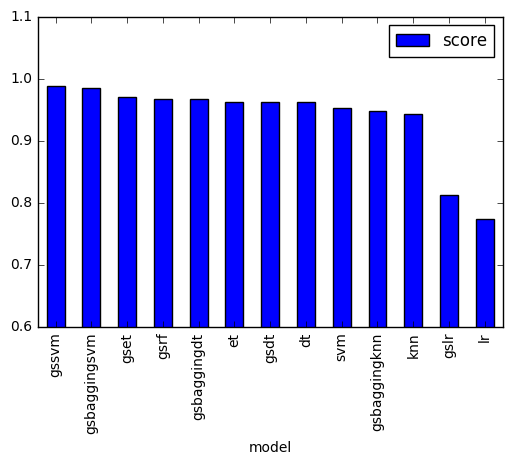

In [76]:
#creating a df to compare all the models
scores = pd.DataFrame([(k, v['score']) for k, v in various_models.iteritems()],
             columns=['model', 'score']).set_index('model').sort_values('score', ascending=False)


scores.plot(kind='bar')
plt.ylim(0.6, 1.1)

scores

## import 538 

In [77]:
#Repeating the tests on my various models
from sklearn.cross_validation import cross_val_score, StratifiedKFold

def retest(model):
    scores = cross_val_score(model, X, y,
                             cv=StratifiedKFold(y, shuffle=True),
                             n_jobs=-1)
    m = scores.mean()
    s = scores.std()
    
    return m, s

for k, v in various_models.iteritems():
    cvres = retest(v['model'])
    print k, 
    various_models[k]['cvres'] = cvres
    

knn gsrf svm et

//anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
//anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
//anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


 gsbaggingsvm gslr

//anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
//anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
//anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


 gsbaggingdt gsdt lr gset gssvm

//anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
//anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
//anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


 gsbaggingknn dt


,score,error
model,,
gssvm,0.986693,0.002934
dt,0.981488,0.005339
gsbaggingdt,0.977439,0.006154
gsbaggingsvm,0.976267,0.007818
gsdt,0.975129,0.009187
gsrf,0.972232,0.012100
gset,0.964129,0.006342
et,0.958330,0.002509
gsbaggingknn,0.957160,0.012105


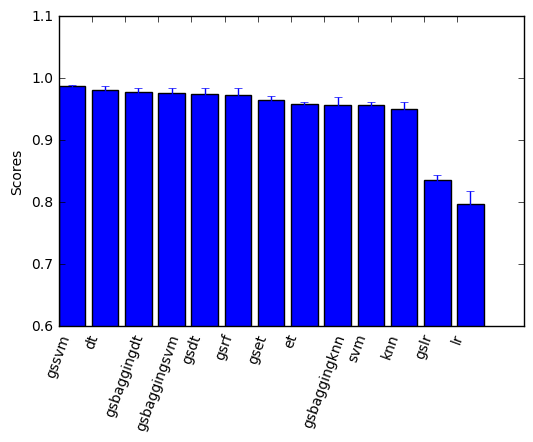

In [78]:
cvscores = pd.DataFrame([(k, v['cvres'][0], v['cvres'][1] ) for k, v in various_models.iteritems()],
                        columns=['model', 'score', 'error']).set_index('model').sort_values('score', ascending=False)



fig, ax = plt.subplots()
rects1 = ax.bar(range(len(cvscores)), cvscores.score,
                yerr=cvscores.error,
                tick_label=cvscores.index)

ax.set_ylabel('Scores')
plt.xticks(rotation=70)
plt.ylim(0.6, 1.1)

cvscores

The top 7 listed above were very close to each other in their scores; with svm and dt making the stronges showing.
This lab was extensive with all the different models used; it was extremely helpful in giving me a deeper understanding of the modeling process. For this reason it is one of my favorite labs from our course.